<a href="https://colab.research.google.com/github/guthi1/reinforcement-learning/blob/main/Assignment_4/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 -- Learning to use RL Hive library (140 Points Total)**

# Instructions

 




* This is an individual assignment. You are not allowed to discuss the problems with other students.
* Part of this assignment will be autograded by gradescope. You can use it as 
immediate feedback to improve your answers. You can resubmit as many times as you want.
* All your solution, code, analysis, graphs, explanations should be done in this same notebook.
* Please make sure to execute all the cells before you submit the notebook to the gradescope. You will not get points for the plots if they are not generated already.
* If you have questions regarding the assignment, you can ask for clarifications in Piazza. You should use the corresponding tag for this assignment.
* Please use the following branch of RLHive for your experiments: <https://github.com/chandar-lab/RLHive/tree/rl_class>



This assignment has 4 parts. The goals of these parts are:

* Question 1: Understand the usage of RL Hive library and run DQN on minigrid environment across multiple seeds, report observations/intuitions while varying replay buffer sizes in DQN.
* Question 2: Run DQN on minigrid environment across multiple seeds, report observations/intuitions while varying target network update frequencies.
* Question 3: Run DQN agent on minigrid environment across multiple seeds for varying values of update horizons, report observations/intuitions while observing performance changes.
* Question 4: Run ablation studies on Rainbow algorithm to observe the contribution of each baseline component used in the algorithm. Report observations and intuitions regarding this observation.








#  Example -  Training DQN agent on Minigrid

In RLHive, there are config samples for DQN agents, for different environment including, Atari, Gym, Hanabi, Marlgrid, Minatar, and Minigrid. 

In this tutorial, we are using a simple environment from Minigrid called `MiniGrid-Empty-5x5-v0` which is an empty room and the objective of the agent is to reach the green square. The reward provided to the agent on reaching the green square is penalized depending on how many steps it took to reach there.

<!-- About the environment - We are using `MiniGrid-Empty-5x5-v0` environment which is an empty room and the objective of the agent is to reach the green sqare, the reward provided to the agent on reaching the green square is penalized and dependent on how many steps it took to reach there. -->

<p align="center">
  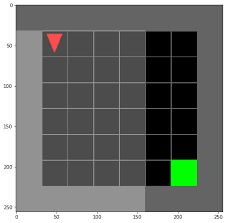
</p>

In [ ]:
## used for updating config.yaml files 
!pip install ruamel.yaml &> /dev/null
!pip install opencv-python
!pip install git+https://github.com/chandar-lab/RLHive.git@rl_class &> /dev/null

## change the gym version, because of breaking changes in gym 0.25
!pip install gym==0.21.0 &> /dev/null
!pip install pygame &> /dev/null

In [ ]:
!pip install gym_minigrid==1.0.2 &> /dev/null
!wget https://www.dropbox.com/s/nyqx3v5atit9nex/configs.zip
!unzip "/content/configs.zip" -d "/content/" 

Now that we have installed RLHive library and the dependencies, we will now see how to run experiments using this library. There are several ways to run an experiment with RLHive. But, an important component that is requirerd to run an experiment on RLHive is the Config file. In the following exercises we provide the config files with certain configurations. These config files need to be used while running your experiments for this assignment. Please also refer to the Hive [documentation](https://rlhive.readthedocs.io/en/stable/index.html#) if you would like to learn more about the library

A typical config file in RLHive looks is an YAML file and has the following structure:

```
agent:
  name: DQNAgent
  kwargs:
    representation_net:
      name: MLPNetwork
      kwargs:
        hidden_units: [256, 256]
    discount_rate: .9
    replay_buffer:
      name: CircularReplayBuffer
    reward_clip: 1.0
```







<!-- Before we train the agent, first step is to install the environment dependencies.  -->
<!-- ## Run RLHive
The simplest way to run RLhive (for single agent) is enough to run:

 `hive_single_agent_loop -p PATH/TO/CONFIG_FILE`.  **😃**
 
 In this case, we can just simply use the ready config files for DQN agent and gyn environemnts:

 ` hive_single_agent_loop -p gym/dqn.yml`.

By running this line, the learning curves of the agent have been shown in wandb in addition to the log files.   -->

For our following experiments the files needed to run each experiment would be located in the following folder structure. Also the results from your experiments would be saved in the respective folder locations as well. Below, we have also shown an example of how to train a DQN agent using the config files along with certain modifyable parameters.
```
experiments 
|-- Q1 (Buffer Size)
    |-- buffer_capacity_100
    |-- buffer_capacity_10000
    |-- buffer_capacity_100000 
|-- Q2 (Target update Frequency)
    |-- update_freq_1
    |-- update_freq_100
    |-- update_freq_1000
    |-- update_freq_10000
|-- Q3 (TD Update Horizon)
    |-- n-step updates DQN
        |-- n_step_1
        |-- n_step_3
        |-- n_step_10
|-- Q4 (Ablation Studies)
    |-- Rainbow
        |-- Understand contribution of each baseline in Rainbow

```






In [ ]:
# # Training the DQN Agent
# num_seeds=2
# for idx in range(num_seeds):
#   !hive_single_agent_loop --config  config.yml --run_name 'MiniGrid-FourRooms-v0-image-dqn-{idx}' --train_steps 50000  --agent.hidden_units [128, 128] --agent.epsilon_schedule.end_value 0.5 --save_dir 'experiment/minigrid_four_rooms_test'


In [ ]:
# num_seeds=2
# for idx in range(num_seeds):
#   !hive_single_agent_loop --config  config.yml --run_name 'minigrid-empty-16x16-image-dqn-{idx}' --train_steps 50000  --agent.hidden_units [128, 128] --agent.epsilon_schedule.end_value 0.5 --save_dir 'experiment/minigrid16*16_test'


Now, as you probably realised already, to use a DQN agent with different parameters or hyper-parameters, e.g. different layers with different sizes, adding or removing target network, different schedules for updating the target network, etc. all we need to do is to create the desired config file and change its parameters accordingly and then train the agent using this config.

<!-- In the next step we can train this agent using the training loop of the class SingleAgentRunner.

Now if we want to use another agent, all we need to do is to create another config file and change its parameters accordingly and then train the agent on this config using 
the `hive_single_agent_loop`. -->

<!-- 
Now if we want to use another agent, all we need to do is to override the name of the agent field while runnning `hive_single_agent_loop`. Example if we want to replace the DQNAgent by the Rainbow agent, we can do this by executing the following line: -->


Moreover, in order to see the results for the ChompLogger(name of logger used by RLHive), you will need to plot your own plots using the log files that are generated in the experiment folder. Below, we provide the code to create this visualization:

In [ ]:
# from hive.utils import visualization

# visualization.plot_results(
#     experiments_folder='experiment',
#     runs_folders=['minigrid_four_rooms_test'],
#     x_key='train',
#     y_key='train/full_episode_length',rc_params={},
#     smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing": 0.3}),
#     output_file='minigrid_four_room_test.png'
# )

In [ ]:
# visualization.plot_results(experiments_folder='experiment',
#     runs_folders=['minigrid_four_rooms_test'],
#     run_names=['test 0'],
#     x_key='train',
#     y_key='train/0_reward',rc_params={},
#     smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing":0.3}),
#     output_file='minigrid_reward_test.png')

Note that sometimes we have plots with high variance in RL. So they tend to be noisy. For clarity in visualizations, we typically smooth the plots usingg some smoothing functions (as shown in the code above). Here we have used smoothing with exponential function. We recommend using the same for all visualizations in this assignment The code snippets shown above are commented out intentionally. Please DO NOT run these, it is just for demonstration purposes.

**IMPORTANT NOTE:** We are providing logs with some information while the training happens. The default frequency is every 100 steps of training but it could be modified by setting the test_frequency to a higher number like 2000 or 10000 (for eg. `test_frequency = 10000`) if you do not want too much information.

# Q1: DQN w/ Varying Buffer Sizes (25 Pts Total)

---



**Quick Intro to DQN:** The DQN (Deep Q-Network) algorithm was developed by DeepMind in 2015. It was able to solve a wide range of Atari games (some to superhuman level) by combining reinforcement learning and deep neural networks at scale. The algorithm was developed by enhancing a classic RL algorithm called Q-Learning with deep neural networks and a technique called experience replay. It is impractical to represent the Q-function as a table containing values for each combination of state and actions as in Tabular Q-Learning . Instead, we train a function approximator, such as a neural network with parameters , to estimate the Q-values in DQN.

A Key component of DQN style algorithms is that, they maintain a buffer of past experiences and sample from this so called 'Replay Buffer' to make updates. In this section of experiments, we will vary the size of this Replay Bufffer and observe the differences in algorithms performance. 

## Experiments (15 Pts)

As shown in the example section, you will need to fill in the few lines of code below to run these experiments. You will be writing the code to run these experiments for 3 different random seeds and for different values of the parameter of interest.

In the section below, we will vary the replay buffer capacity of DQN. Use the DQN config file that was downloaded earlier along with the following parameters as inputs:
*   Train steps: 50000
*   Replay Buffer Capacity: {100, 10000, 100000}
*   Env: 'MiniGrid-Empty-5x5-v0'
*   Save results directory: experiment/buffer_size/
*   Use exponential smooothing function in the visualization (argument to plot_results)

Results should be saved along with the replay buffer capacity values in different folders for ease of visualizing results (For eg. "experiment/buffer_size/minigrid5*5_100_test/" where, 100 refers to the capacity of the replay buffer)

**IMPORTANT** In order to avoid losing progress if Google Colab runtime disconnects, we will save the generated images to your google drives respectively. So we wil mount the drives to the colab workspace. In order to do that, you need to give access to your google drive storage after running the commands below. Moreover by doing this, we will also make sure you do not have to run the experiments again if your runtime disconnects after one section of experiments finish.

In [3]:
import cv2
from google.colab import drive
import os
from IPython.display import Image
drive.mount("/content/drive", force_remount=True)
path = "/content/drive/My Drive/RL_assign4/"
try:
  os.mkdir(path)
except:
  print("path exists")

Mounted at /content/drive
path exists


In [11]:
capacities =[100, 10000, 100000]

In [ ]:
# CODE TO RUN YOUR EXPERIMENTS-----
# BEGIN SOLUTION
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'buffer_size' 
training_steps = 50000

for idx in range(num_seeds):
    for var in capacities:
        !hive_single_agent_loop --config  configs/config_dqn.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.replay_buffer.capacity '{var}' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_{var}_test/'


# END SOLUTION
# ---------------------------------

In [13]:
# CODE FOR VISUALIZATIONS (PLOTTING THE EPISODE LENGTH TREND and REWARDS OVER STEPS)------------
# BEGIN SOLUTION
from hive.utils import visualization

visualization.plot_results(
    experiments_folder=f"{path}experiment/buffer_size/",
    runs_folders=[f"minigrid5*5_{capacity}_test" for capacity in capacities],
    x_key='train',
    y_key='train/full_episode_length',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing": 0.3}),
    output_file=f"{path}experiment/buffer_size/episode_length.png"
)

visualization.plot_results(
    experiments_folder=f"{path}experiment/buffer_size/",
    runs_folders=[f"minigrid5*5_{capacity}_test" for capacity in capacities],
    x_key='train',
    y_key='train/0_reward',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing":0.3}),
    output_file=f"{path}experiment/buffer_size/reward.png"
)
# END SOLUTION
# ---------------------------------

If you notice from the examples sectopm, RLHive visualization usually just saves the plots as .png files. Here we will load the saved images from google drive using IPython's Image function to display the plots.

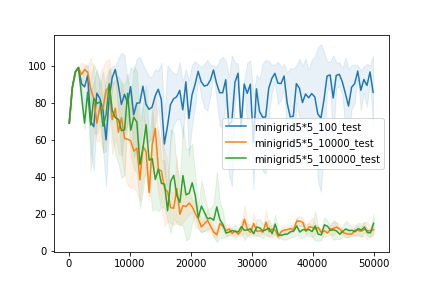

In [4]:
folder_path = "/content/drive/My Drive/RL_assign4/buffer_capacity/"
try:
  os.mkdir(folder_path)
except:
  print("path exists")
I_episode = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/buffer_size/episode_length.png')
I_rewards = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/buffer_size/reward.png')
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/buffer_size/episode_length.png', I_episode)
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/buffer_size/reward.png', I_rewards)
Image('/content/drive/My Drive/RL_assign4/experiment/buffer_size/episode_length.png')

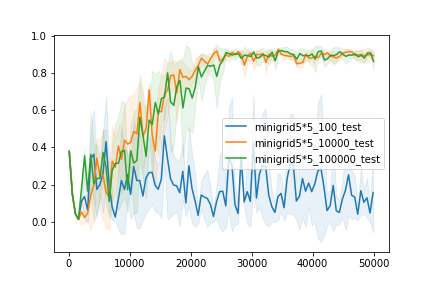

In [5]:
Image('/content/drive/My Drive/RL_assign4/experiment/buffer_size/reward.png')

## Questions (10 Pts)

1. What happens when the buffer size in DQN is at either extremes i.e when the buffer size is very small(100) and when the buffer size is very large(100000)? (6pts)


Answer:

One problem that can occur with a replay_buffer that is too small is that the elements of the replay_buffer can be all correlated. Indeed, by saving only the last 100 frames of a game, the actions performed between each frame are all correlated. We can think of a game where a ball is thrown and all the positions of the ball follow each other. When we sample this replay buffer with only 100 elements, all the data are correlated and this will prevent the agent from learning. 

If on the contrary the replay buffer is too large, it will record states and transitions where the agent has not yet learned (maybe the first actions are good, but after a bad action happened, the first actions will not be considered as good). We want to have a replay buffer that is not too large so that the training process samples only the actions of the last episode and not from the beginning.

2. Do you observe these effects in the plots you get above? If so, explain or else why not? (4pts)

Answer:

As for our experiment, we observed the negative effects of a too big replay buffer, but not of a too small one. This is due to the size of the state space of our game. This one is not correlated enough from action to action to have an effect.

# Q2: DQN w/ Varying target network update frequency (30 Pts Total)

In synchronous learning methods like DQN, there are usually two neural networks. One referred to as an 'Online' network and other referred to as the 'Target' network. The target network is a copy of the online network and it typically is used for one main purpose. Please give your intuition regarding its purpose in DQN below. This parameter copies are updated at a frequency called the target network update frequency. We will also vary this frequency in the experiments below and observe changes in DQN's performance.




## Questions (15 Pts)

1. Why is a Target Network needed in case of DQN? (5Pts)

Answer:

In DQN, instead of having an exact value function, we have a function approximation. Therefore, it makes sense to have two neural networks that are synchronized every n_epochs, because otherwise, a single network will fit too much to a specific state at each step instead of taking an average of the entire state space. 

2. What happens when the target network update frequency is very high i.e you update it quite often like after every update of online network? What would happen if the update frequency is very delayed like 10000? (5Pts)

Answer:

If the update frequency is too high, the agent will not be able to learn because the state space will never contain the next new action, it will adapt too much to the last action(s). If the update frequency is too low, the agent will take a long time to learn because the parameter update in the training phase will not be done often.

3. Do you see similar trends in your plots based on your intuition from the previous question? (5Pts)

Answer:

We can see the exact results in our experiments, having a fixed frequency update at each step, the agent never learns, we can see the line is almost flat and always returning to the same episod length reward as the beginning if the agent "learn" something.

A slightly lower update frequency allows the agent to learn, but in our case, this value was still too frequent and the agent was not able to maintain its knowledge. When a bad move occurred, the agent degraded very quickly. 

By drastically reducing the frequency of updates, we can see that the agent succeeds in learning, but we observe a delay between each learning step. 

In the end, this frequency is a hyper parameter that must be found for each problem.

## Experiments (15 Pts)


Again as in the previous section, you will need to fill in the few lines of code below to run these experiments. You will be writing the code to run these experiments for 3 different random seeds and for different values of the parameter of interest.

In the section below, we will vary the target network update frequency of DQN.
In this section of experiments, we will vary target network update frequency and observe the differences in algorithms performance. Here we will consider three different options for the frequency: {1, 100, 1000}

Use the DQN config file that was downloaded earlier along with the following parameters as inputs:
* Train steps: 100000
* Target Network Update frequency: {1, 100, 10000}
* Env: 'MiniGrid-Empty-16x16-v0'
* Save results directory: experiment/target_freq/
* Use exponential smooothing function in the visualization (argument to plot_results)

Results should be saved along with the target network update frequency values in different folders for ease of visualizing results. (For eg. "experiment/target_freq/minigrid16*16_100_test/" where, 100 refers to the target network update frequency value)

In [7]:
frequencies=[1, 100, 10000]

In [ ]:
# CODE TO RUN YOUR EXPERIMENTS-----
# BEGIN SOLUTION
num_seeds=3

env = 'MiniGrid-Empty-16x16-v0'
exp_name = 'target_freq' 
training_steps = 100000

for idx in range(num_seeds):
    for var in frequencies:
        !hive_single_agent_loop --config  configs/config_dqn.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.replay_buffer.capacity '{var}' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_{var}_test/'


# END SOLUTION
# ---------------------------------

In [9]:
# CODE FOR VISUALIZATIONS (PLOTTING THE EPISODE LENGTH TREND and REWARDS OVER STEPS)------------
# BEGIN SOLUTION
from hive.utils import visualization


visualization.plot_results(
    experiments_folder=f"{path}experiment/target_freq/",
    runs_folders=[f"minigrid5*5_{freq}_test" for freq in frequencies],
    x_key='train',
    y_key='train/full_episode_length',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing": 0.3}),
    output_file=f"{path}experiment/target_freq/episode_length.png"
)

visualization.plot_results(
    experiments_folder=f"{path}experiment/target_freq/",
    runs_folders=[f"minigrid5*5_{freq}_test" for freq in frequencies],
    x_key='train',
    y_key='train/0_reward',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing":0.3}),
    output_file=f"{path}experiment/target_freq/reward.png"
)
# END SOLUTION
# ---------------------------------

**IMPORTANT** In order to avoid losing progress if Google Colab runtime disconnects, we will save the generated images to your google drives respectively. This way, we will make sure you do not have to run the experiments again if your runtime disconnects after one section of experiments finish.

If you notice from the examples sectopm, RLHive visualization usually just saves the plots as .png files. Here we will load the saved images from google drive using IPython's Image function to display the plots.

In [10]:
import cv2
from google.colab import drive
import os
from IPython.display import Image
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


path exists


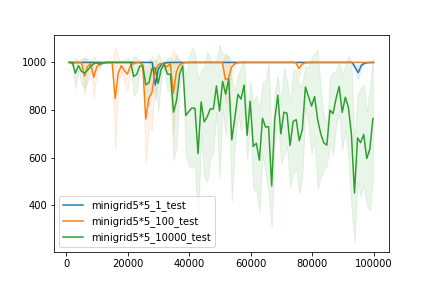

In [13]:
folder_path = "/content/drive/My Drive/RL_assign4/target_freq/"
try:
  os.mkdir(folder_path)
except:
  print("path exists")
I_episode = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/target_freq/episode_length.png')
I_rewards = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/target_freq/reward.png')
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/target_freq/episode_length.png', I_episode)
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/target_freq/reward.png', I_rewards)
Image('/content/drive/My Drive/RL_assign4/experiment/target_freq/episode_length.png')

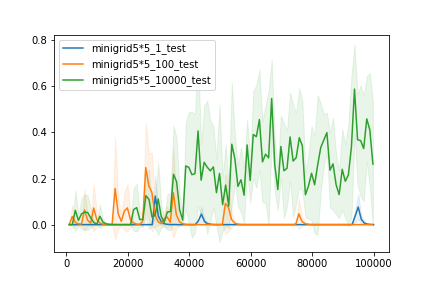

In [14]:
Image('/content/drive/My Drive/RL_assign4/experiment/target_freq/reward.png')

# Q3: n-step updates in DQN (35 Pts Total)

Multi-step learning computes the temporal difference error using multi-step transition, instead of a single step. It is usually referred to as the n-step TD update. DQN uses a single-step update by default. In the below experiments we will try to vary this update horizon to larger numbers and observe how that affects performance of a DQN agent.

##Questions (20 Pts)

1. What is the significance of having multi-step TD updates in DQN? On an intutitive level, is this helpful for an RL Agent? If so, why? (5Pts)

Answer:

2. What are some disadvantages of having a higher update horizon? (5Pts)


Answer:

3. What happens when the update horizon is very high in DQN? Does it help with learning? If so why is that? Or If not please explain your intuitions. (5Pts)

Answer:

4. Based on your intuitions, do you see similar trend from the visualizations of DQN agent with higher update horizon values? (5Pts)

Answer:

## Experiments (15 Pts)

Again as in the previous section, you will need to fill in the few lines of code below to run these experiments. You will be writing the code to run these experiments for 3 different random seeds and for different values of the parameter of interest.

In the section below, we will vary the update horizon in TD update equation of DQN.

Here we will consider three different options for the update horizon values: {1, 3, 10}

Use the DQN config file that was downloaded earlier along with the following parameters as inputs:
* Train steps: 50000
* Update Horizon values: {1, 3, 10}
* Env: 'MiniGrid-Empty-5x5-v0'
* Save results directory: experiment/n_step/
* Use exponential smooothing function in the visualization (argument to plot_results)

Results should be saved along with the target network update frequency values in different folders for ease of visualizing results. (For eg. "experiment/n_step/minigrid5*5_3_test/" where, 3 refers to the update horizon value)

In [15]:
horizon = [1, 3, 10]

In [24]:
# CODE TO RUN YOUR EXPERIMENTS-----
# BEGIN SOLUTION
num_seeds=3

for idx in range(num_seeds):
    for hor in horizon:
        !hive_single_agent_loop --config  configs/config_dqn.yml --run_name 'minigrid-empty-5x5-image-dqn-{idx}' --train_steps 50000 --agent.n_step '{hor}' --save_dir 'experiment/n_step/minigrid5*5_{hor}_test/'


num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'n_step' 
training_steps = 50000

for idx in range(num_seeds):
    for var in horizon:
        !hive_single_agent_loop --config  configs/config_dqn.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.n_step '{var}' --agent.replay_buffer.n_step '{var}' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_{var}_test/'



# END SOLUTION
# ---------------------------------

Streaming output truncated to the last 5000 lines.
[INFO 2022-12-03 06:10:48,105 base.py:148] Running testing.
[INFO 2022-12-03 06:10:48,141 base.py:153] Testing results: {'0_episode_length': 5.0,
 '0_reward': 0.9550000000000002,
 'full_episode_length': 5.0}
[INFO 2022-12-03 06:10:48,881 base.py:144] 45207/50000 training steps completed.
[INFO 2022-12-03 06:10:48,881 base.py:148] Running testing.
[INFO 2022-12-03 06:10:48,923 base.py:153] Testing results: {'0_episode_length': 5.0,
 '0_reward': 0.9550000000000002,
 'full_episode_length': 5.0}
[INFO 2022-12-03 06:10:49,616 base.py:144] 45401/50000 training steps completed.
[INFO 2022-12-03 06:10:49,616 base.py:148] Running testing.
[INFO 2022-12-03 06:10:49,651 base.py:153] Testing results: {'0_episode_length': 5.0,
 '0_reward': 0.9550000000000002,
 'full_episode_length': 5.0}
[INFO 2022-12-03 06:10:50,391 base.py:144] 45603/50000 training steps completed.
[INFO 2022-12-03 06:10:50,391 base.py:148] Running testing.
[INFO 2022-12-03 06:10

In [17]:
# CODE FOR VISUALIZATIONS (PLOTTING THE EPISODE LENGTH TREND and REWARDS OVER STEPS)------------
# BEGIN SOLUTION

from hive.utils import visualization


visualization.plot_results(
    experiments_folder=f"{path}experiment/n_step/",
    runs_folders=[f"minigrid5*5_{freq}_test" for freq in horizon],
    x_key='train',
    y_key='train/full_episode_length',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing": 0.3}),
    output_file=f"{path}experiment/n_step/episode_length.png"
)

visualization.plot_results(
    experiments_folder=f"{path}experiment/n_step/",
    runs_folders=[f"minigrid5*5_{freq}_test" for freq in horizon],
    x_key='train',
    y_key='train/0_reward',rc_params={},
    smoothing_fn=visualization.get_smoothing_fn('exponential', {"smoothing":0.3}),
    output_file=f"{path}experiment/n_step/reward.png"
)


# END SOLUTION
# ---------------------------------

**IMPORTANT** In order to avoid losing progress if Google Colab runtime disconnects, we will save the generated images to your google drives respectively. This way, we will make sure you do not have to run the experiments again if your runtime disconnects after one section of experiments finish.

If you notice from the examples sectopm, RLHive visualization usually just saves the plots as .png files. Here we will load the saved images from google drive using IPython's Image function to display the plots.

In [ ]:
import cv2
from google.colab import drive
import os
from IPython.display import Image
drive.mount("/content/drive", force_remount=True)

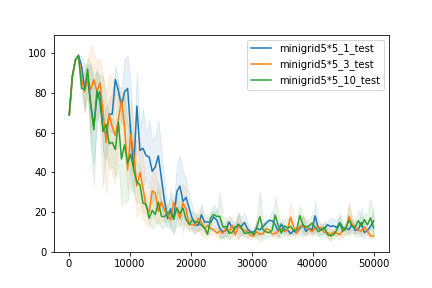

In [18]:
folder_path = "/content/drive/My Drive/RL_assign4/n_step/"
try:
  os.mkdir(folder_path)
except:
  print("path exists")
I_episode = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/n_step/episode_length.png')
I_rewards = cv2.imread('/content/drive/My Drive/RL_assign4/experiment/n_step/reward.png')
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/n_step/episode_length.png', I_episode)
cv2.imwrite('/content/drive/My Drive/RL_assign4/experiment/n_step/reward.png', I_rewards)
Image('/content/drive/My Drive/RL_assign4/experiment/n_step/episode_length.png')

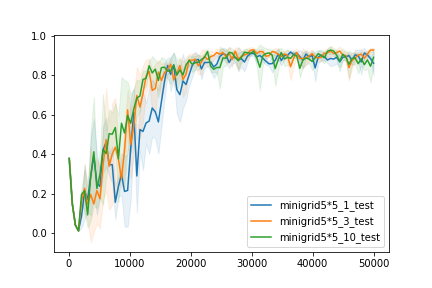

In [19]:
Image('/content/drive/My Drive/RL_assign4/experiment/n_step/reward.png')

# Q4: Ablation Studies (50 Pts)

## Rainbow Ablations 

**Quick Intro to Rainbow:** Rainbow is another Value based algorithm like DQN but it is a single agent that integrates several variants of DQN that offfer substantial benefits. Moreover, Rainbow is shown to have better performance than any of the baseline methods included in the ensemble. There are a total of 6 different baseline algorithms included in Rainbow such as:
1. DQN (multi-step)
2. Double DQN or DDQN
3. Prioritized DDQN
4. Dueling DDQN
5. Distributional DQN
6. Noisy DQN

Moreover, please note that, in this section we will consider a modified version of Rainbow and only include the algorithms covered in class i.e {DQN, Double DQN or DDQN, Prioritized DDQN, Multi-step DQN}.

In this section, we will try to see the contribution of each individual component in Rainbow and try to answer some questions based on this.

### Ablations to understand the contribution of each baseline in Rainbow


## Questions (20 Pts)
1. What are your observations from the following plots? Which baseline contributes most to the performance of Rainbow? and Why? (10 Pts)

Answer:

2. Find the original Rainbow Paper and see which component contributes the most to Rainbow's performance. Which factors does it depend on? (10 Pts)

Answer:

## Experiments (30 Pts)

Again as in the previous section, you will need to fill in the few lines of code below to run these experiments. You will be writing the code to run these experiments for 3 different random seeds and for different values of the parameter of interest.

Now in the following experiment, we will run some ablation studies to understand the impact or contribution of each baseline method in Rainbow. We would like to compare the performance of Rainbow with DQN and 5 other agents. 

The other agents compared here are:

1. Rainbow w/o double DQN
2. Rainbow w/o prioritized DDQN
3. Rainbow w/o multi-step DQN
4. DQN with same config parameters as Rainbow

(**NOTE** We are using a modified version of Rainbow based on the concepts covered in class)

Use the Rainbow config file that was downloaded earlier along with the following parameters as inputs:
* Train steps: 100000
* Env: 'MiniGrid-Empty-5x5-v0'
* Set the corresponding component of Rainbow to 'False' or 'True' depending on the experiment
* Save results directory: experiment/rainbow_ablations/
* Use exponential smooothing function in the visualization (argument to plot_results)

Note that you should edit the Rainbow config file provided for runnning DQN in this question. (To ensure they have similar config parameters to compare)

Results should be saved along with the modified agents name in different folders for ease of visualizing results. (For eg. "experiment/rainbow_ablations/minigrid5*5_full_rainbow_test/" where, "full rainbow" refers to the modified rainbow agent with the 3 components)

In [21]:
# CODE TO RUN YOUR EXPERIMENTS-----
# BEGIN SOLUTION
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'rainbow_ablations' 
training_steps = 100000
 
for idx in range(num_seeds):
    # Full rainbom
    !hive_single_agent_loop --config  configs/config_rainbow.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_full_rainbow_test/'

# END SOLUTION
# ---------------------------------

Streaming output truncated to the last 5000 lines.
[INFO 2022-12-03 17:49:17,602 base.py:144] 61252/100000 training steps completed.
[INFO 2022-12-03 17:49:17,603 base.py:148] Running testing.
[INFO 2022-12-03 17:49:18,214 base.py:153] Testing results: {'0_episode_length': 97.9,
 '0_reward': 0.02889999999999999,
 'full_episode_length': 97.9}
[INFO 2022-12-03 17:49:18,497 base.py:144] 61421/100000 training steps completed.
[INFO 2022-12-03 17:49:18,497 base.py:148] Running testing.
[INFO 2022-12-03 17:49:19,127 base.py:153] Testing results: {'0_episode_length': 100.0, '0_reward': 0.0, 'full_episode_length': 100.0}
[INFO 2022-12-03 17:49:19,484 base.py:144] 61629/100000 training steps completed.
[INFO 2022-12-03 17:49:19,484 base.py:148] Running testing.
[INFO 2022-12-03 17:49:20,057 base.py:153] Testing results: {'0_episode_length': 91.8, '0_reward': 0.0838, 'full_episode_length': 91.8}
[INFO 2022-12-03 17:49:20,364 base.py:144] 61805/100000 training steps completed.
[INFO 2022-12-03 17

In [22]:
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'rainbow_ablations' 
training_steps = 100000
 
for idx in range(num_seeds):
    # Without Double DQN
    !hive_single_agent_loop --config  configs/config_rainbow.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.double 'Flase' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_without_double_DQN_test/'


Streaming output truncated to the last 5000 lines.
[INFO 2022-12-03 18:09:44,728 base.py:153] Testing results: {'0_episode_length': 100.0, '0_reward': 0.0, 'full_episode_length': 100.0}
[INFO 2022-12-03 18:09:44,948 base.py:144] 61824/100000 training steps completed.
[INFO 2022-12-03 18:09:44,948 base.py:148] Running testing.
[INFO 2022-12-03 18:09:44,987 base.py:153] Testing results: {'0_episode_length': 5.0,
 '0_reward': 0.9550000000000002,
 'full_episode_length': 5.0}
[INFO 2022-12-03 18:09:45,292 base.py:144] 62007/100000 training steps completed.
[INFO 2022-12-03 18:09:45,292 base.py:148] Running testing.
[INFO 2022-12-03 18:09:45,336 base.py:153] Testing results: {'0_episode_length': 5.0,
 '0_reward': 0.9550000000000002,
 'full_episode_length': 5.0}
[INFO 2022-12-03 18:09:45,706 base.py:144] 62200/100000 training steps completed.
[INFO 2022-12-03 18:09:45,706 base.py:148] Running testing.
[INFO 2022-12-03 18:09:46,316 base.py:153] Testing results: {'0_episode_length': 96.7,
 '0_r

In [23]:
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'rainbow_ablations' 
training_steps = 100000
 
for idx in range(num_seeds):
    # Without prioritized relay_buffer
    !hive_single_agent_loop --config  configs/config_rainbow.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.replay_buffer 'None' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_without_relay_buffer_test/'


[INFO 2022-12-03 18:24:33,895 torch_utils.py:221] Registered PyTorch optimizers.
[INFO 2022-12-03 18:24:33,895 torch_utils.py:257] Registered PyTorch optimizers.
[INFO 2022-12-03 18:24:33,897 utils.py:151] Registered PyTorch initialization functions.
[INFO 2022-12-03 18:24:33,898 __init__.py:20] Registered function approximators.
[INFO 2022-12-03 18:24:34,039 __init__.py:21] Registered replays.
[INFO 2022-12-03 18:24:34,921 schedule.py:204] Registered schedules.
[INFO 2022-12-03 18:24:34,922 loggers.py:454] Registered loggers.
[INFO 2022-12-03 18:24:34,924 __init__.py:27] Registered agents.
[INFO 2022-12-03 18:24:34,938 __init__.py:40] Registered environments.
Traceback (most recent call last):
  File "/usr/local/bin/hive_single_agent_loop", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/hive/runners/single_agent_loop.py", line 209, in main
    runner = set_up_experiment(config)
  File "/usr/local/lib/python3.8/dist-packages/hive/runners/single_

In [24]:
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'rainbow_ablations' 
training_steps = 100000
 
for idx in range(num_seeds):
    # Without multi-step
    !hive_single_agent_loop --config  configs/config_rainbow.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.n_step '&n_step 1' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_without_multi-step_test/'



[INFO 2022-12-03 18:24:40,912 torch_utils.py:221] Registered PyTorch optimizers.
[INFO 2022-12-03 18:24:40,912 torch_utils.py:257] Registered PyTorch optimizers.
[INFO 2022-12-03 18:24:40,914 utils.py:151] Registered PyTorch initialization functions.
[INFO 2022-12-03 18:24:40,915 __init__.py:20] Registered function approximators.
[INFO 2022-12-03 18:24:41,075 __init__.py:21] Registered replays.
[INFO 2022-12-03 18:24:41,980 schedule.py:204] Registered schedules.
[INFO 2022-12-03 18:24:41,980 loggers.py:454] Registered loggers.
[INFO 2022-12-03 18:24:41,982 __init__.py:27] Registered agents.
[INFO 2022-12-03 18:24:41,992 __init__.py:40] Registered environments.
Traceback (most recent call last):
  File "/usr/local/bin/hive_single_agent_loop", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/hive/runners/single_agent_loop.py", line 209, in main
    runner = set_up_experiment(config)
  File "/usr/local/lib/python3.8/dist-packages/hive/runners/single_

In [ ]:
num_seeds=3

env = 'MiniGrid-Empty-5x5-v0'
exp_name = 'rainbow_ablations' 
training_steps = 100000
 
for idx in range(num_seeds):
    # TODO
    !hive_single_agent_loop --config  configs/config_rainbow.yml --run_name '{env}-image-dqn-{idx}' --train_steps '{training_steps}' --agent.n_step '&n_step 1' --environment.env_name '{env}' --save_dir '{path}experiment/{exp_name}/minigrid5*5_todo_test/'


In [ ]:
# CODE FOR VISUALIZATIONS (PLOTTING THE EPISODE LENGTH TREND and REWARDS OVER STEPS)------------
# BEGIN SOLUTION




# END SOLUTION
# ---------------------------------

**IMPORTANT** In order to avoid losing progress if Google Colab runtime disconnects, we will save the generated images to your google drives respectively. This way, we will make sure you do not have to run the experiments again if your runtime disconnects after one section of experiments finish.

If you notice from the examples sectopm, RLHive visualization usually just saves the plots as .png files. Here we will load the saved images from google drive using IPython's Image function to display the plots.

In [ ]:
import cv2
from google.colab import drive
import os
from IPython.display import Image
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/My Drive/RL_assign4/rainbow_ablations/"
try:
  os.mkdir(folder_path)
except:
  print("path exists")
I_episode = cv2.imread('/content/minigrid_episode_length_rainbow_ablations_test.png')
I_rewards = cv2.imread('/content/minigrid_reward_rainbow_ablations_test.png')
cv2.imwrite('/content/drive/My Drive/RL_assign4/rainbow_ablations/minigrid_episode_length_rainbow_ablations_test.png', I_episode)
cv2.imwrite('/content/drive/My Drive/RL_assign4/rainbow_ablations/minigrid_reward_rainbow_ablations_test.png', I_rewards)
Image('/content/drive/My Drive/RL_assign4/rainbow_ablations/minigrid_episode_length_rainbow_ablations_test.png')

In [ ]:
Image('/content/drive/My Drive/RL_assign4/rainbow_ablations/minigrid_reward_rainbow_ablations_test.png')

In [ ]:
!zip -r /content/experiment.zip /content/experiment